<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [238]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [239]:
X, y  = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [240]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)


In [241]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)


In [242]:
# svc classifier and we are using rfb kernal in that 

rbf=SVC(kernel="rbf",C=100,gamma=0.001)                


In [243]:
#fitting the data 

rbf.fit(x_train,y_train)


SVC(C=100, gamma=0.001)

In [244]:
sup_vecs=rbf.support_vectors_   
dual_coefs=rbf.dual_coef_
intercept=rbf.intercept_

In [249]:
# refer : ##https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually
# refer : https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually

def decision_function(x_cv,gamma):
    
    predict=[]
    decision=[]

    # for each datapoint in x_cv dataset 
    for x_query_point in x_cv:
      # intiating with 0
        decision__function = 0

        # for each point j in supp_vecs 
        for K in range(len(sup_vecs)):
             norm2 = np.linalg.norm(sup_vecs[K, :] -x_query_point)**2                    # calculating the kernel(K(xi,xq)
             decision__function = decision__function + dual_coefs[0, K] * np.exp(-gamma*norm2)       
             
              # MOST IMPORTANTLY HERE WE ARE INCREMENTING THE INTERCEPT TERM                                 # calculating the sign
        decision__function += intercept         

        # defining the decison function limit if its less then 0 else 1
        decision.append(decision__function)
        if (decision__function)<0:                
            predict.append(0)
        else:
         # else 1
            predict.append(1)

            # predicting the decision using numpy array 
    return np.array(predict),decision          

In [250]:
gamma=0.001
f_cv,decision=decision_function(x_cv,gamma)
print(f_cv)

# IN ABOVE CODE SNIPPET IMPLEMENTING THE DECISION FUNCTION OF CV DATA WITH GAMMA VALUE 0.001

[1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 

In [251]:
print(np.array(decision).T)

[[ 9.78553590e-01 -1.11760405e+00 -2.04720532e+00 -3.09565428e+00
  -2.79889732e+00 -3.19223178e+00 -3.06506013e+00 -2.65326082e+00
   3.33031294e+00 -1.27804286e+00  1.23713395e+00 -2.26620102e+00
   1.15545642e+00  1.55336237e+00 -3.18756150e-01  1.20293177e+00
   1.88290414e+00  1.19637781e+00 -2.78451489e-01 -2.12325762e+00
   1.96221487e+00 -4.75759780e-01  1.08589552e+00 -2.55752818e+00
  -2.89278575e+00 -2.43600679e+00 -3.82456176e+00 -2.45783486e+00
  -2.27106674e+00 -1.23683699e+00 -1.16338685e+00 -2.10126553e+00
  -1.80723683e+00 -2.97522570e+00 -1.78272899e+00 -2.57605838e+00
   1.08577450e+00 -1.38072948e-01 -2.30545739e+00 -2.29909830e+00
   7.42068597e-01 -2.97019249e+00 -2.90071729e+00  1.41309686e+00
   2.78861618e+00 -1.89767766e+00 -1.98425643e+00 -1.45561992e+00
  -2.89596097e+00 -2.67027549e+00 -2.39828370e+00 -3.04643574e+00
  -1.56860504e+00  3.60540603e-01 -1.74975096e+00 -1.77366133e+00
  -2.78686913e+00 -2.13619233e+00 -1.90398564e+00  1.33960705e+00
  -3.24020

In [252]:
rbf.decision_function(x_cv)

array([ 9.78553590e-01, -1.11760405e+00, -2.04720532e+00, -3.09565428e+00,
       -2.79889732e+00, -3.19223178e+00, -3.06506013e+00, -2.65326082e+00,
        3.33031294e+00, -1.27804286e+00,  1.23713395e+00, -2.26620102e+00,
        1.15545642e+00,  1.55336237e+00, -3.18756150e-01,  1.20293177e+00,
        1.88290414e+00,  1.19637781e+00, -2.78451489e-01, -2.12325762e+00,
        1.96221487e+00, -4.75759780e-01,  1.08589552e+00, -2.55752818e+00,
       -2.89278575e+00, -2.43600679e+00, -3.82456176e+00, -2.45783486e+00,
       -2.27106674e+00, -1.23683699e+00, -1.16338685e+00, -2.10126553e+00,
       -1.80723683e+00, -2.97522570e+00, -1.78272899e+00, -2.57605838e+00,
        1.08577450e+00, -1.38072948e-01, -2.30545739e+00, -2.29909830e+00,
        7.42068597e-01, -2.97019249e+00, -2.90071729e+00,  1.41309686e+00,
        2.78861618e+00, -1.89767766e+00, -1.98425643e+00, -1.45561992e+00,
       -2.89596097e+00, -2.67027549e+00, -2.39828370e+00, -3.04643574e+00,
       -1.56860504e+00,  

**both the output are same**

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


#creating dataset

In [253]:
X, y = make_classification (n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)               # HERE CREATING THE RANDOM SAMPLE OF DATA 

In [254]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)          # SPLITTING THE DATA


In [255]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)      # SPLITING THE DATA INTO 2 PARTS TRAIN TEST AND CROSS VALIDATION 


In [256]:
rbf=SVC(kernel="rbf",C=100,gamma=0.001)                     # HERE WE ARE USING RBF KERNAL AND ITS ALSO A DEFAULT KERNAL IN SVM 
 

In [257]:
rbf.fit(x_train,y_train)                               # FIT THE DATA 


SVC(C=100, gamma=0.001)

In [258]:
gamma=0.001                         # STARTING THE GAMMA VALUE FROM 0.001


In [259]:
sup_vecs=rbf.support_vectors_
dual_coefs=rbf.dual_coef_                # refer :  https://stackoverflow.com/questions/22816646/the-dimension-of-dual-coef-in-sklearn-svc
intercept=rbf.intercept_

In [262]:
def decision_function(x_cv,gamma):
    
    predict=[]
    decision=[]

    # for each query point in x_cv dataset 
    for x_query_point in x_cv:

      # initiating decision function with 0
        decision__function = 0
        for K in range(len(sup_vecs)):

          
             norm2 = np.linalg.norm(sup_vecs[K, :] -x_query_point)**2  # calculating the kernel(K(xi,xq)
             decision__function = decision__function + dual_coefs[0, K] * np.exp(-gamma*norm2) # calculating the sign

 # now will increment the intercept term 
        decision__function += intercept
        # now will append the decision function
        decision.append(decision__function)
        # defining the limit for decison function  if its less than 0 then 0 else 1
        if (decision__function)<0:                ##https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually
            predict.append(0)
        else:
          # else 1
            predict.append(1)
            # returning the using numpy array 
    return np.array(decision)  

In [263]:
f_cv=decision_function(x_cv,gamma)                            # calculating f_cv based on decision function


# **DEFINING THE SIGMOID FUNCTION**

In [264]:
def sigmoid(w,x,b):
  # defining the sigmoid function 
    return 1/(1+np.exp(-(np.dot(x,w.T)+b)))       #return 1/1+e(-x)

# **THIS IS COST FUNCTION FOR LOGESTIC REGRESSION**

In [265]:
def logloss(w,x,y,b,reg=0):                            #HERE WE ARE GIVING THE PARAMETER TO LOGLOSS FUNCTION 
    val=sigmoid(w,x,b)
    # defining the loss function 
    return -np.mean(y*np.log10(val)+(1-y)*np.log10(1-val))+reg                      # cost function of logistic regressioN
    # HERE WE ARE SIMPLY EXECUTING THE FORMULA OF COST FUNCTION 

In [266]:
count_one=list(y_cv).count(1)          # HERE WE ARE COMPUTING THE Y+ AS 1    AND Y- AS 0
count_zero=list(y_cv).count(0)  

    # calculating y+ and y_
y_positive=(count_one+1)/(count_one+2)

y_negative=1/(count_zero+2)

In [267]:
def update(y_cv,y_plus,y_minize):
    u_cv=[]
    for point in y_cv:
      # if value 1 then it will be positive                          # update function convert y_cv into y+,y_
        if point==1:
                u_cv.append(y_positive)                   # APPENDING THE Y+ TO VALUE 1 IN CV DATA 
        else:
  # else that will be negative 
              u_cv.append(y_negative)                 #      # APPENDING THE Y- TO VALUE 1 IN CV DATA
    return(np.array(u_cv))  

In [268]:
y_cv=update(y_cv,y_positive,y_negative)         # HERE COMPUTING THE BOTH Y+ AND Y- IN CV DATA 


In [269]:
w = np.zeros_like(f_cv[0])# initial weight vector
b = 0      # initial intercept value
eta0  = 0.0001     # learning rate
alpha = 0.0001       # lambda value

print(len(y_cv))
print(len(f_cv))

1000
1000


In [270]:
initial=logloss(w,f_cv,y_cv,b)                     # SO AS PER INSTRUCTION PRINTING THE INTIAL LOG HERE 
print('this is log loss we got as starting')
print("Initial log loss ==>",initial)

this is log loss we got as starting
Initial log loss ==> 0.3010299956639812


**SGD alorithm for calculating optimal w and b**

In [277]:
# refer : https://stackoverflow.com/questions/64739896/implementing-stochastic-gradient-descent
# refer : https://datascience.stackexchange.com/questions/30786/implementation-of-stochastic-gradient-descent-in-python

def sgd_algo(f_cv,y_cv,eta0,alpha,w,b,epoch):
    t=0.001 # tolerence
    test_loss=[]  
    epoc=[]   # empty variable created for epochs value in future 
    for i in  range(0,epoch): 
        epoc.append(i)  # now will append the epoch value 
        for K in range(0,N):


          # refer : sgd assginment code snippet taken 
            reg=alpha/2*np.dot(w.T,w)        
                                                                          #regulrization term
            # writing the equation to update the weight                                                               
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[K])*(y_cv[K]-sigmoid(w,f_cv[K],b)))                       # updating weight vector

            # defining the intercept term 
            b = b+(eta0*(y_cv[K]-sigmoid(w,f_cv[K],b)))  
            
                       # updatind intercept    
        test=logloss(w,f_cv,y_cv,b,reg)
        test_loss.append(test)

        if i<=t :
            continue     
            # here we are a condition if the difference between test last previus value is greatar than t then continue else break                                                              
            if abs(test_loss[i]-test_loss[i-1])>t:           # here we are checking  convergence 
                continue
            else:
                break 
    return w,b,epoc,test_loss

In [278]:
epoch=50                            # HERE WE HAVE GIVEN THE EPOCH VALUE 40
we,be,epo,loss=sgd_algo(f_cv,y_cv,eta0, alpha,w,b,epoch)
print('this is the optimal weight for model  ')
print("optimal weight = ",we)
print('==>'*25)
print('this is optimial intercept value of model')
print("optimal intercept = ",be)

this is the optimal weight for model  
optimal weight =  [1.18379931]
==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>
this is optimial intercept value of model
optimal intercept =  -0.16239206514508156


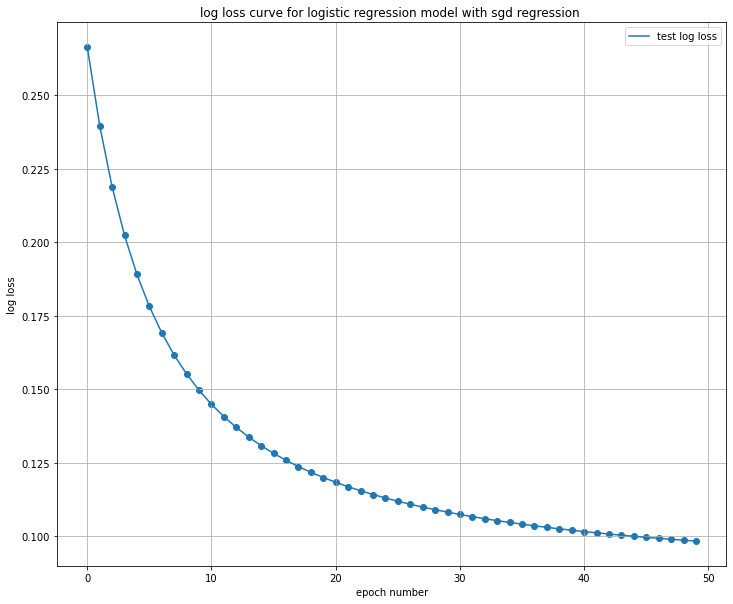

In [279]:
# refer : https://www.geeksforgeeks.org/pyplot-in-matplotlib/

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.grid()
plt.plot(epo,loss, label='test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve for logistic regression model with sgd regression ')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()


# **OBSERVATION: LOG-LOSS CURVE ON LOGISTIC REGRESSION**

# **1. AS WE CAN SEE THAT LOSS IS GETTING DECRESING AS NUMBER OF EPOCH INCREASING**

# **2. AS WE HAVE RUN TILL 50 EPOCHS LOSS DECREASING EXPONETIOALLY**

In [280]:
test_data=decision_function(x_test,gamma)                           # printing the decision fucntion  


In [281]:
def probability(test_data,w,b):

# compute the probability 
    probability_P =1/(1+np.exp(-w*test_data+b))                                   
    return probability_P

In [282]:
prob=probability(test_data,we,be)
print("THESE ARE THE PROBABILITY OF FIRST 20 VALUE ")
print('==>'*25)
print(prob[:20])                                    # finally lets print the  20 probability value 

THESE ARE THE PROBABILITY OF FIRST 20 VALUE 
==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>
[[0.22872309]
 [0.9230178 ]
 [0.26044606]
 [0.68005024]
 [0.00180578]
 [0.93105676]
 [0.17322549]
 [0.91092284]
 [0.17943987]
 [0.88754708]
 [0.10588928]
 [0.89353501]
 [0.06657624]
 [0.02170994]
 [0.0223607 ]
 [0.07905585]
 [0.05595814]
 [0.81707152]
 [0.01397373]
 [0.00603034]]


# **THIS IS 20 PREDICTED PROBABILITY VALUE**